# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd

# Loading Dataset

In [5]:
df = pd.read_csv('data/data.csv')

In [6]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

### Convert Date column **object** to **datetime** 

In [31]:
df['Date'] = pd.to_datetime(df['Date'])

In [40]:
df['Time'] = pd.to_datetime(df['Time'])

D:\Temp\ipykernel_7040\2145562215.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


### Add the **Hour** column in df

In [42]:
df['Hour'] = (df['Time']).dt.hour

In [11]:
df.shape

(1000, 17)

In [12]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [14]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [16]:
df.isna().any()

Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
cogs                       False
gross margin percentage    False
gross income               False
Rating                     False
dtype: bool

In [22]:
numerical = []
categorical = []

for i in df.columns:
    if df[i].dtype == 'object':
        categorical.append(i)
    else:
        numerical.append(i)

# Exploratory Data Analysis

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

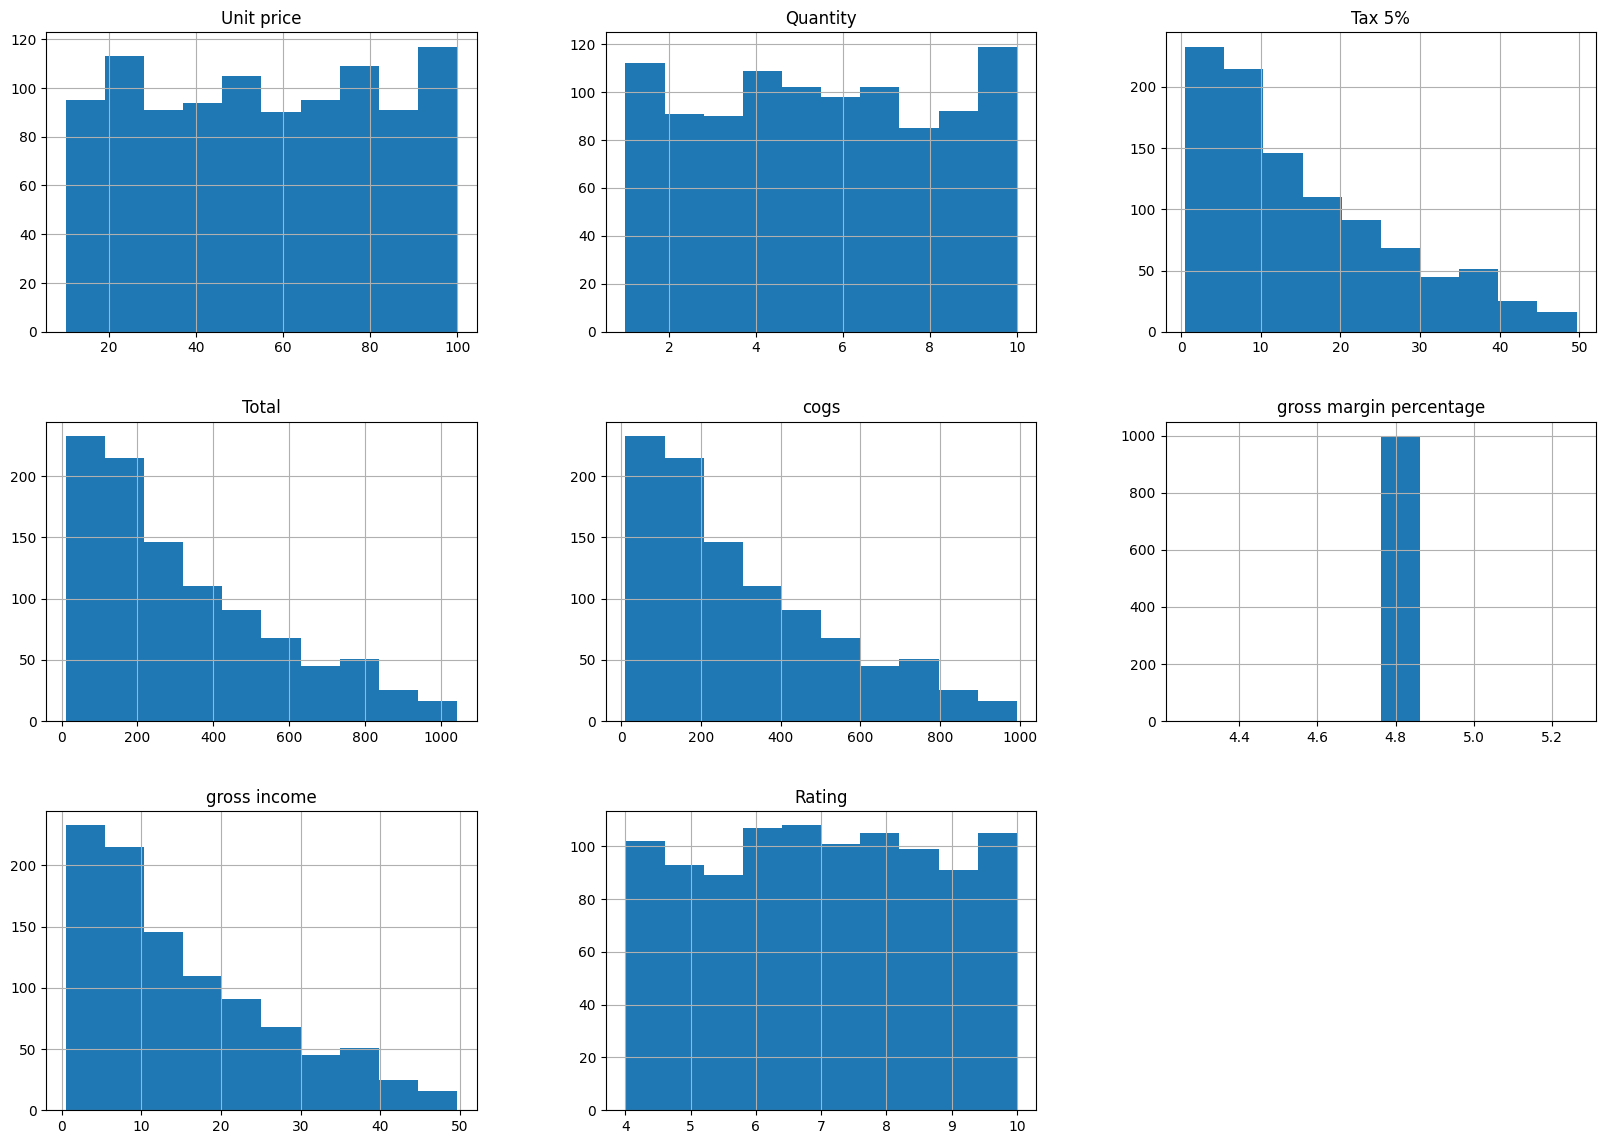

In [20]:

df.hist(figsize=(20,14))
plt.show()

In [23]:
df[numerical].corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


<Axes: >

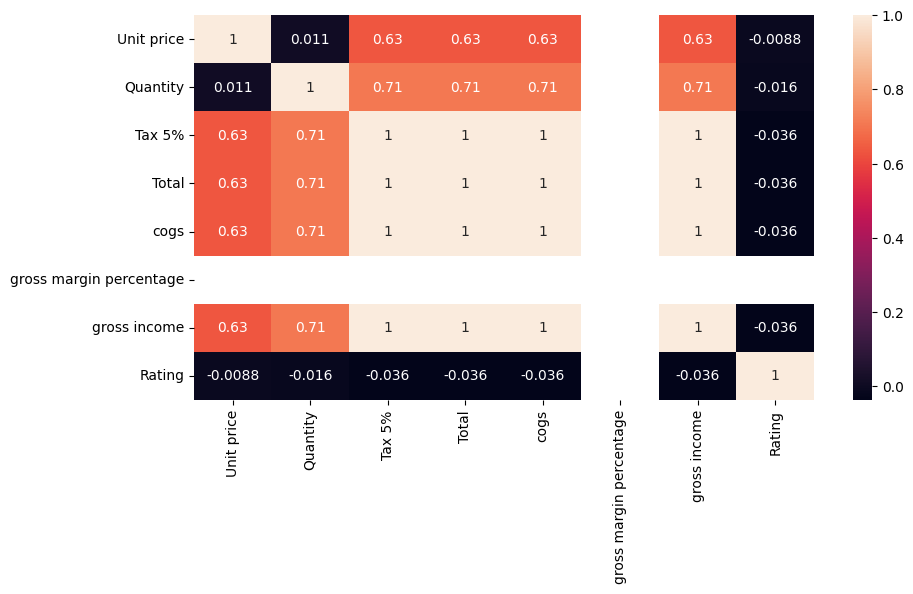

In [38]:
plt.figure(figsize=(10,5))

sns.heatmap(df[numerical].corr(),annot=True)

<Axes: xlabel='Gender', ylabel='count'>

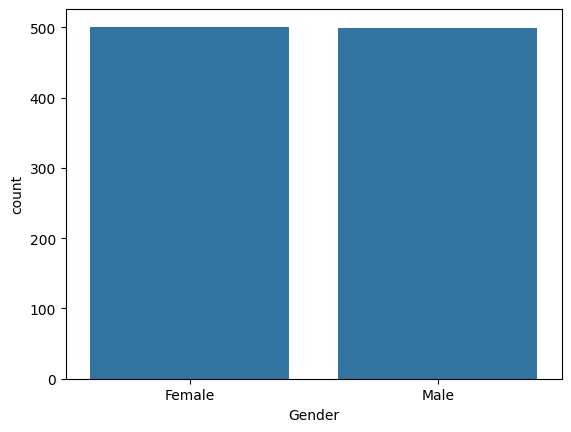

In [27]:
sns.countplot(x='Gender',data=df)

D:\Temp\ipykernel_7040\3414203832.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Branch', y='Rating' , data=df, palette='pastel')


<Axes: xlabel='Branch', ylabel='Rating'>

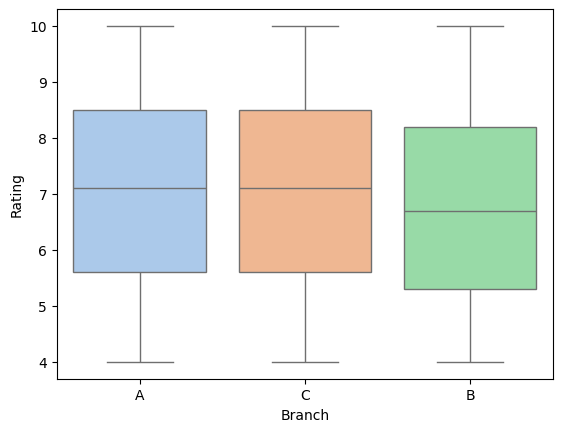

In [47]:
sns.boxplot(x = 'Branch', y='Rating' , data=df, palette='pastel')

<Axes: xlabel='Hour', ylabel='Quantity'>

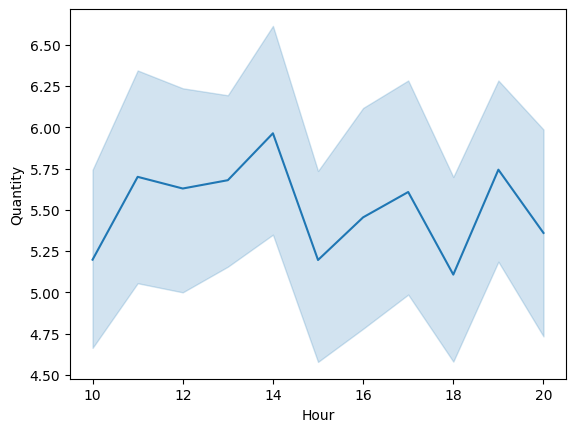

In [44]:
sns.lineplot(x = 'Hour', y='Quantity' , data=df)

D:\Temp\ipykernel_7040\2277873902.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = 'Product line', x='Quantity' , data=df, palette='pastel')


<Axes: xlabel='Quantity', ylabel='Product line'>

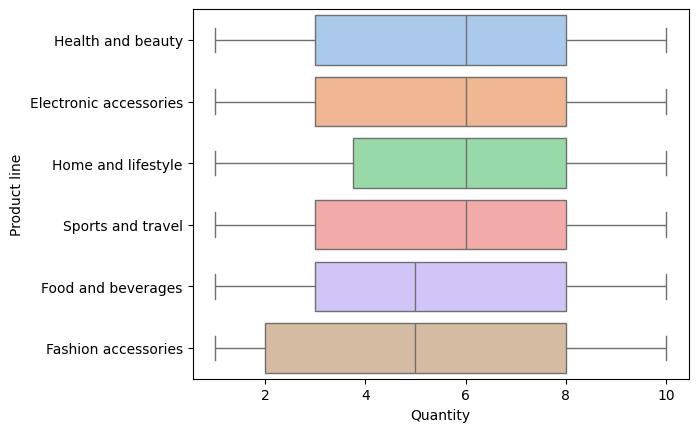

In [46]:
sns.boxplot(y = 'Product line', x='Quantity' , data=df, palette='pastel')

D:\Temp\ipykernel_7040\454440397.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = 'Product line', data=df, palette='pastel')


<Axes: xlabel='count', ylabel='Product line'>

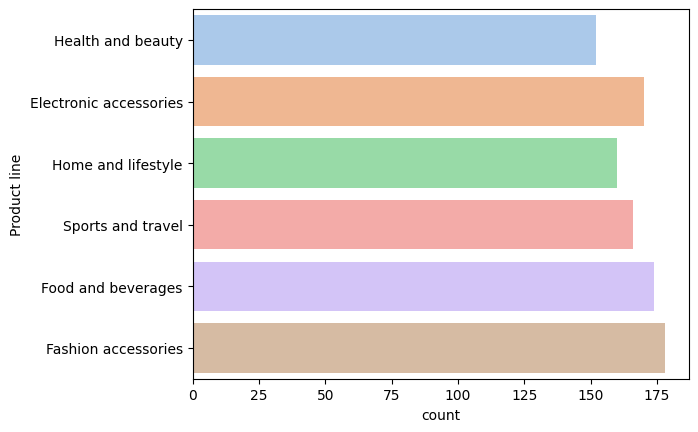

In [48]:
sns.countplot(y = 'Product line', data=df, palette='pastel')

D:\Temp\ipykernel_7040\3440739628.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Payment' , data=df, palette='pastel')


<Axes: xlabel='Payment', ylabel='count'>

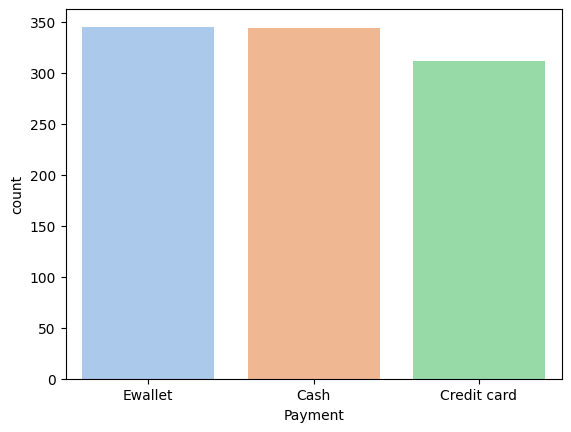

In [50]:
sns.countplot(x = 'Payment' , data=df, palette='pastel')

### Payment from Branch

<Axes: xlabel='Payment', ylabel='count'>

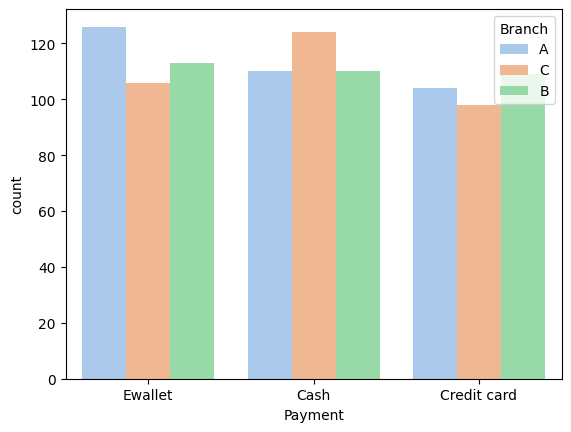

In [51]:
sns.countplot(x = 'Payment' , hue = 'Branch' , data = df, palette='pastel')

### Customer Analysis

In [53]:
df['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

D:\Temp\ipykernel_7040\4124202194.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Customer type' , data=df, palette='pastel')


<Axes: xlabel='Customer type', ylabel='count'>

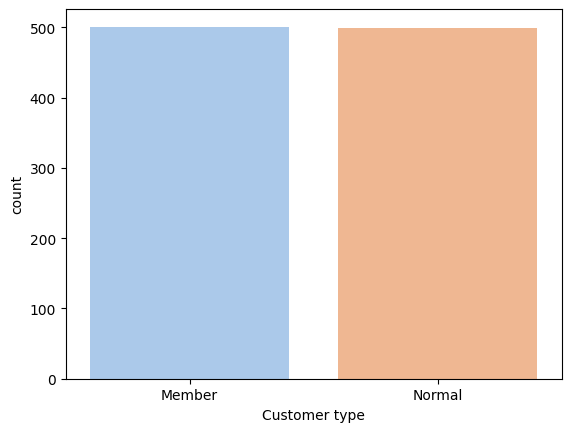

In [54]:
sns.countplot(x = 'Customer type' , data=df, palette='pastel')

Text(0.5, 1.0, 'Customer Type by Branch')

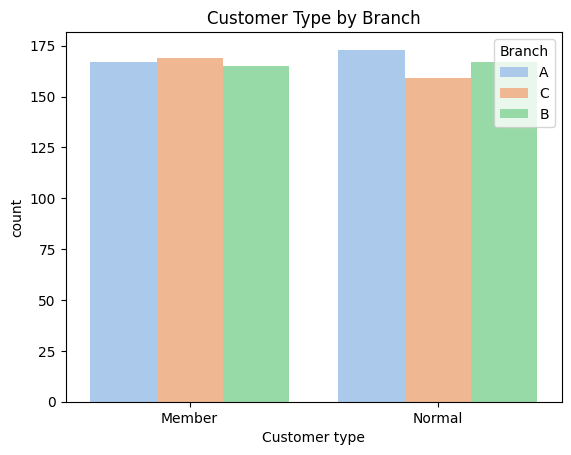

In [55]:
 sns.countplot(x="Customer type", hue = "Branch", data = df , palette = 'pastel').set_title("Customer Type by Branch")

In [59]:
df.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305
